In [34]:
from face_detection.face_detection import get_circle_bounding_box_for_image
from face_alignment.utility import *
from face_alignment.alignment import * 

from matplotlib.patches import Circle
import scipy.optimize as opt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
img = create_test_triplets()

/home/rasmuscarl/CS-ITU/3-semester/Advanced Machine Learning/Project/face_alignment/face_alignment/utility.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(triplets)


In [5]:
c  = get_circle_bounding_box_for_image("../data/train_1/10697993_1.jpg")

In [18]:
def rotate_matrix(theta):
    T = np.zeros((2,2))
    T[0][0] = math.cos(theta) 
    T[0][1] = -math.sin(theta)
    T[1][0] = math.sin(theta)
    T[1][1] = math.cos(theta)
    return T

In [79]:
def eq_8(args):
    x_bar = np.array(aligned)
    x     = np.array(aligned_t1)
    scale = args[0]
    theta = args[1]
    
    R     = rotate_matrix(theta) 
    return np.sum(euclidean_distances(x_bar - np.dot(x*scale, R)))
    #return np.sum(euclidean_distances(x_bar - x*scale))
    

In [97]:
R     = rotate_matrix(math.pi/2) 
scale = -0.555555555 
val   = np.sum(euclidean_distances(aligned - np.dot(aligned_t1*scale, R)))
print(val)

0.12935590525252919


In [94]:
theta_opt = opt.fmin(func=eq_8, x0=[0.5, 0.1])

Optimization terminated successfully.
         Current function value: 0.109373
         Iterations: 143
         Function evaluations: 297


In [95]:
theta_opt

array([-0.55555556,  1.57079632])

In [96]:
math.pi/2

1.5707963267948966

In [6]:
T = np.zeros((2,2))
import math
theta   =  math.pi / 4
T[0][0] = math.cos(theta)
T[0][1] = -math.sin(theta)
T[1][0] = math.sin(theta)
T[1][1] = math.cos(theta)

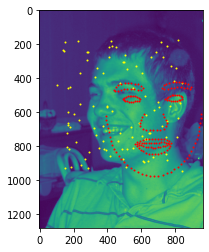

In [90]:
mean_shape = compute_mean_shape(img)

aligned       = align_mean_shape(mean_shape, "../data/train_1/10697993_1.jpg")
scale         = 1.8
theta         = math.pi/2
M             = rotate_matrix(theta)
#aligned_t1    = np.dot(aligned*scale, M)
aligned_mean     = np.mean(aligned, axis=0)
aligned_t1       = aligned - aligned_mean
aligned_t1       = np.dot(aligned_t1*scale, M)
#aligned_t1       = aligned_t1 * scale
aligned_t1       = aligned_t1 + aligned_mean

coords = extract_coords_features("10697993_1.jpg", c, n=100)
plot_image_given_coords("10697993_1.jpg",[coords, mean_shape], colors=["yellow", "red"])


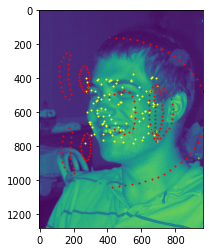

In [110]:
R     = rotate_matrix(math.pi/2) 
scale = -0.555555555 
coords_mean     = np.mean(coords, axis=0)
coords_t1       = coords - coords_mean
coords_t1       = np.dot(coords_t1*scale, R)
#aligned_t1       = aligned_t1 * scale
coords_t1       = coords_t1 + coords_mean

#print(coords_t1)
plot_image_given_coords("10697993_1.jpg",[coords_t1, aligned_t1], colors=["yellow", "red"])


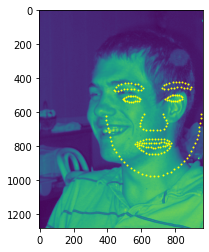

In [55]:
plot_image_given_coords("10697993_1.jpg",[mean_shape])


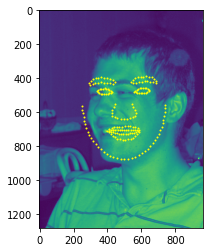

In [56]:
plot_image_given_coords("10697993_1.jpg",[aligned])

In [ ]:
def fit_regression_tree(r_ik):
    '''
    pesudo code for part b of algorithm 1
    
    '''
    #
    # Tree: - set of node splits 
    #       - leafs containing average r_ik
    #       - points for comparing
    
    #build tree
    #for i in range(depth_tree, current_shape):
   #todo  #   warp_new_coord_sytem()
   #todo  #   a)   type:float theta  = generate_split()
     #   a.1) type: point  = find points_from_image()
     #   
    # go_through_I_and_update_leafs()
    # put r_ik in leafs and average

In [ ]:
def learn_regressor():
    
    '''
    pseudo code for algorithm 1
    
    '''
    
    # type [tuple(float, float) ]: point
    
 #done   #1) type: List[ (List[images], List[points], List[floats]) ]:  create_train_data()
                    #Images        #Shape         #Delta
        
  #todo  #2) type: List[floats]: find_mean_delta_values()
    
    #3) for k in range(num_regression_trees): 
            # for i in (size_training_data):
                    # type: List[floats] r_ik = current_delta_values_of_image_i - accumulative result of k-1 regression trees
                    # fit_tree() based on r_ik
                
    
    #4)        update accumulative result
    
    #5) return accumulative value
    
    

In [ ]:
#
# todo: extract features (choose x amount of pixels based on prior distribution (uniform))
#